In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [207]:
articles = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/articles.csv')
customers = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/customers.csv')
# sample_submisison = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/sample_submission.csv')
transactions = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/transactions_train.csv')

# articles dataset analysis

In [27]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [18]:
# first we check if all articles_id are unique
len(articles["article_id"].unique()) == articles.shape[0]

True

In [20]:
articles["article_id"].isna().sum()

0

In [41]:
# produc type number and name are uniquely mapped
articles.groupby('product_type_no')['product_type_name'].nunique().gt(1).any()

False

In [40]:
len(articles[articles['product_type_no']<=-1])

121

In [56]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [77]:
# filling nan values in detail_desc
articles['detail_desc']=articles['detail_desc'].fillna('no detail')
articles['detail_desc'].isna().sum()

0

In [55]:
# graphical appearance number and name are uniquely mapped
articles.groupby('graphical_appearance_no')['graphical_appearance_name'].nunique().gt(1).any()

# graphical appearance number and name are uniquely mapped
articles.groupby('product_code')['prod_name'].nunique().gt(1).any()

# color number and name are uniquely mapped
articles.groupby('colour_group_code')['colour_group_name'].nunique().gt(1).any()

# index number and name are uniquely mapped
articles.groupby('index_code')['index_name'].nunique().gt(1).any()

# index group number and name are uniquely mapped
articles.groupby('index_group_no')['index_group_name'].nunique().gt(1).any()

# section number and name are uniquely mapped
articles.groupby('section_no')['section_name'].nunique().gt(1).any()

False

In [51]:
articles['index_code'].unique()

array(['A', 'B', 'G', 'F', 'C', 'S', 'H', 'D', 'I', 'J'], dtype=object)

In [78]:
# product name and code are not unique
articles.groupby('product_code')['prod_name'].nunique().gt(1).any()

True

In [123]:
prod_code=articles.groupby('product_code', as_index=False)['prod_name'].nunique()

In [124]:
prod_code=prod_code[prod_code['prod_name']>=2]

In [126]:
prod_code.groupby('prod_name').agg('count')

,product_code
prod_name,
2,1842
3,268
4,54
5,12


<AxesSubplot:xlabel='index_code', ylabel='Count'>

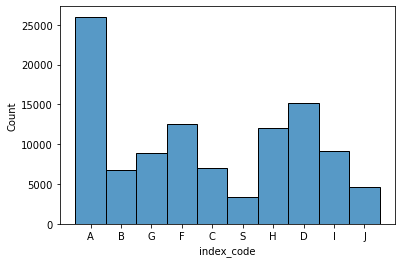

In [127]:
sns.histplot(data=articles,x=articles['index_code'])

In [140]:
articles[articles['index_code'] == 'A']['product_group_name'].describe()

count                  26001
unique                    13
top       Garment Upper body
freq                   14095
Name: product_group_name, dtype: object

In [145]:
articles[articles['index_code'] == 'A'].groupby('index_code')['product_group_name'].min()

index_code
A    Accessories
Name: product_group_name, dtype: object

In [144]:
articles[articles['product_group_name']=='Unknown']

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
64,156224002,156224,Box 4p Socks,-1,Unknown,Unknown,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Semi-matte socks with a short shaft. 20 denier.
4015,473954008,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4016,473954013,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4017,473954014,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,17,Yellowish Brown,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4018,473954015,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,17,Yellowish Brown,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104622,925139001,925139,Ruben set,-1,Unknown,Unknown,1010016,Solid,9,Black,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Set with a matching iPhone case and protective...
104623,925139002,925139,Ruben set,-1,Unknown,Unknown,1010016,Solid,51,Light Pink,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Set with a matching iPhone case and protective...
104624,925139003,925139,Ruben set,-1,Unknown,Unknown,1010016,Solid,61,Light Purple,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Set with a matching iPhone case and protective...
104796,927131002,927131,Payton Hood(1),-1,Unknown,Unknown,1010010,Melange,8,Dark Grey,...,Men Sport Woven,S,Sport,26,Sport,22,Men H&M Sport,1005,Jersey Fancy,Track jacket in sturdy cotton-blend jersey wit...


# Customers dataset analysis

In [146]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [227]:
customers[customers["Active"].isna()]["FN"].unique()
# print(f"Total number of users is {customers.shape[0]}. {na_users/customers.shape[0]*100}% have no age.")

array([nan,  1.])

In [209]:
customers["age"].max()

99.0

In [210]:
c=customers[customers["age"]>=80]['age']

<AxesSubplot:xlabel='age', ylabel='Count'>

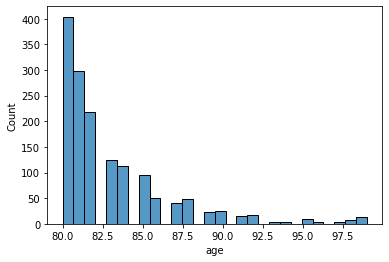

In [211]:
sns.histplot(data=c)

<AxesSubplot:>

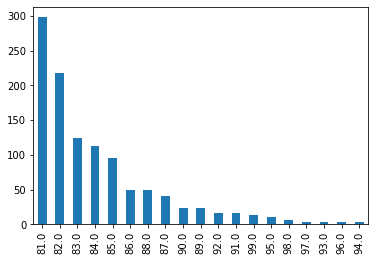

In [212]:
customers[customers["age"] > 80]["age"].value_counts().plot.bar()

<AxesSubplot:>

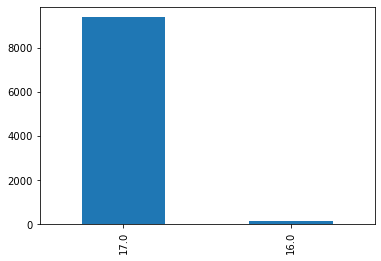

In [213]:
customers[customers["age"] < 18]["age"].value_counts().plot.bar()

In [214]:
customers["club_member_status"].isna().sum()
# print(f"Total number of users is {customers.shape[0]}. {na_active/customers.shape[0]*100}% have no active.")

6062

In [215]:
customers['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [193]:
customers[customers['Active'].isna()]["club_member_status"].isna().sum()
print(f"Total number of users is {customers.shape[0]}. {5744/customers.shape[0]*100}% have no active.")

5744

In [216]:
customers["fashion_news_frequency"].replace("NONE","None",inplace=True)

In [217]:
customers["fashion_news_frequency"].unique()

array(['None', 'Regularly', nan, 'Monthly'], dtype=object)

In [221]:
c=customers['fashion_news_frequency'].isna().sum()
print(f"Total number of users is {customers.shape[0]}. {c/customers.shape[0]*100}% have no active.")

Total number of users is 1371980. 1.1668537442236768% have no active.


In [228]:
customers["postal_code"].isna().sum()

0

# transactions dataset analysis

In [231]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [234]:
transactions.duplicated().any()

True

In [235]:
transactions.shape[0]

31788324

In [239]:
transactions.drop_duplicates(inplace=True)

In [240]:
transactions.shape[0]

28813419

In [241]:
31788324 - 28813419

2974905

In [243]:
transactions["t_dat"].describe()

count       28813419
unique           734
top       2019-09-28
freq          176904
Name: t_dat, dtype: object

In [244]:
transactions["t_dat"].max()

'2020-09-22'

In [245]:
transactions["t_dat"].min()

'2018-09-20'

In [246]:
transactions["t_dat"].mode()

0    2019-09-28
Name: t_dat, dtype: object

In [250]:
transactions[transactions["t_dat"]=='2019-09-28'].count()

t_dat               176904
customer_id         176904
article_id          176904
price               176904
sales_channel_id    176904
dtype: int64

In [263]:
transactions["month"] = transactions["t_dat"].map(lambda x: x[5:7])

In [264]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year_of_signup,month_of_signup,month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,09,09,09
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,09,09,09
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,09,09,09
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,09,09,09
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,09,09,09


<AxesSubplot:>

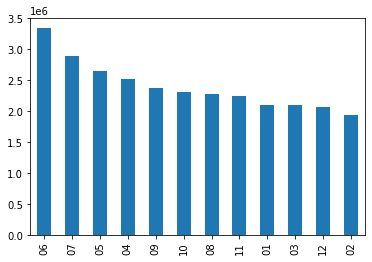

In [266]:
transactions["month"].value_counts().plot.bar()

In [267]:
transactions["month"].value_counts()

06    3343041
07    2885384
05    2654190
04    2520109
09    2377116
10    2316718
08    2269062
11    2243386
01    2097408
03    2095207
12    2067230
02    1944568
Name: month, dtype: int64

In [269]:
transactions['sales_channel_id'].unique()

array([2, 1], dtype=int64)

In [270]:
transactions['price'].isna().sum()

0

In [271]:
transactions['price'].describe()

count    2.881342e+07
mean     2.772868e-02
std      1.910103e-02
min      1.694915e-05
25%      1.567797e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

In [272]:
merged_df = pd.merge(transactions, customers, on="customer_id")

In [273]:
merged_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year_of_signup,month_of_signup,month,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,09,09,09,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,09,09,09,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,09,09,09,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,03,03,03,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2,02,02,02,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [277]:
bins=[10,20,30,40,50,60,70,80,90,100]
labels=['teen','20s','30s','40s','50s','60s','70s','80s','90s']
merged_df['AgeGroup'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)

In [278]:
merged_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year_of_signup,month_of_signup,month,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,AgeGroup
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,09,09,09,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,20s
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,09,09,09,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,20s
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,09,09,09,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,20s
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,03,03,03,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,20s
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2,02,02,02,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,20s


<AxesSubplot:>

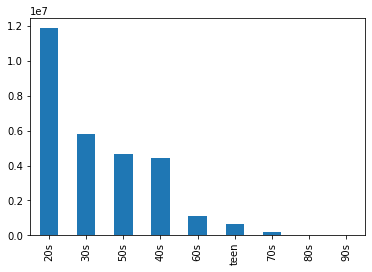

In [279]:
merged_df["AgeGroup"].value_counts().plot.bar()

<AxesSubplot:xlabel='AgeGroup', ylabel='Count'>

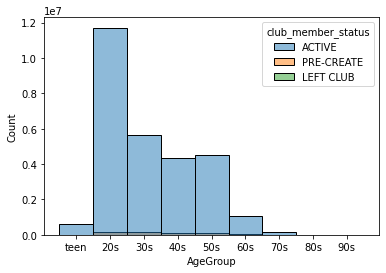

In [281]:
sns.histplot(data=merged_df, x="AgeGroup", hue="club_member_status")

In [284]:
merged_df['club_member_status'].value_counts()

ACTIVE        28178118
PRE-CREATE      572546
LEFT CLUB         7682
Name: club_member_status, dtype: int64